### Basic imports

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report

### Accessing data

In [2]:
df = pd.read_csv('Epileptic Seizure Recognition.csv')

In [3]:
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [5]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


#target label

y contains the category of the 178-dimensional input vector. Specifically y in {1, 2, 3, 4, 5}:

5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open

4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed

3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area

2 - They recorder the EEG from the area where the tumor was located

1 - Recording of seizure activity

basically 1->seizure activity rest->non-seizure activities

In [6]:
#converting into binary problem
bin_map = {1:1,2:0,3:0,4:0,5:0}
df['y'] = df['y'].replace(bin_map)
df['y'].value_counts()

y
0    9200
1    2300
Name: count, dtype: int64

<Axes: xlabel='y', ylabel='count'>

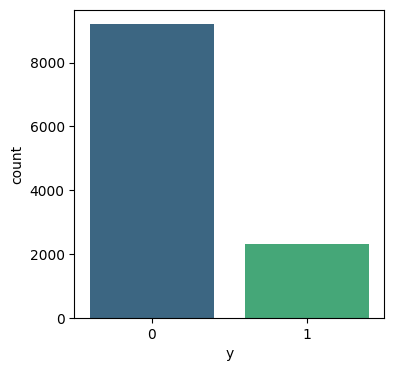

In [7]:
#after mapping
plt.figure(figsize=(4,4))
sns.countplot(x='y',data=df,palette='viridis')

In [8]:
#checking for missing data
df.isnull().sum().sort_values(ascending=False)
#no missing data in this case

Unnamed    0
X113       0
X115       0
X116       0
X117       0
          ..
X61        0
X62        0
X63        0
X64        0
y          0
Length: 180, dtype: int64

In [9]:
#duplicates
df.drop_duplicates(inplace=True)

In [10]:
df.drop('Unnamed',axis=1,inplace=True)

### Splitting data

In [11]:
X = df.drop('y',axis=1)
y = df['y']

### Oversampling data

In [12]:
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report
def plot_confusion_matrix(y_true, y_pred,name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix {name}")
    plt.show()

In [13]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
rand = RandomOverSampler()
print("Before:", Counter(y))
X_rand, y_rand = rand.fit_resample(X, y)
print("After:", Counter(y_rand))

Before: Counter({0: 9200, 1: 2300})
After: Counter({0: 9200, 1: 9200})


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [15]:
#oversampled data
X_train_rand,X_test_rand,y_train_rand,y_test_rand = train_test_split(X_rand,y_rand,test_size=0.3)

### Scaling Data

In [16]:
from sklearn.preprocessing import StandardScaler
st_sclr = StandardScaler()
X_train = st_sclr.fit_transform(X_train)
X_test = st_sclr.transform(X_test)

In [17]:
X_train_rand = st_sclr.fit_transform(X_train_rand)
X_test_rand = st_sclr.transform(X_test_rand)

# Base Models - Dtree,RFC,SVM,Logistic

## Decision Tree

In [18]:
#for orignal data
from sklearn.tree import DecisionTreeClassifier
dtree_1 = DecisionTreeClassifier()
dtree_1.fit(X_train,y_train)
pred_dtree_1 = dtree_1.predict(X_test)
print("Decision Tree with Orignal Data: ")
print(classification_report(y_test,pred_dtree_1))

Decision Tree with Orignal Data: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2747
           1       0.84      0.79      0.81       703

    accuracy                           0.93      3450
   macro avg       0.89      0.88      0.88      3450
weighted avg       0.93      0.93      0.93      3450



In [19]:
#oversampled data
dtree_2 = DecisionTreeClassifier()
dtree_2.fit(X_train_rand,y_train_rand)
pred_dtree_2 = dtree_2.predict(X_test_rand)
print("Decision Tree with Oversampled Data: ")
print(classification_report(y_test_rand,pred_dtree_2))

Decision Tree with Oversampled Data: 
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2754
           1       0.95      0.99      0.97      2766

    accuracy                           0.97      5520
   macro avg       0.97      0.97      0.97      5520
weighted avg       0.97      0.97      0.97      5520



#### Decision Tree with oversampled data performs better on identifying both classes

## Random Forest

In [20]:
#rfc with orignal data
from sklearn.ensemble import RandomForestClassifier
rfc_1 = RandomForestClassifier()
rfc_1.fit(X_train,y_train)
pred_rfc_1 = rfc_1.predict(X_test)
print("Random Forest with orignal data: ")
print(classification_report(y_test,pred_rfc_1))

Random Forest with orignal data: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2747
           1       0.96      0.94      0.95       703

    accuracy                           0.98      3450
   macro avg       0.97      0.96      0.97      3450
weighted avg       0.98      0.98      0.98      3450



In [21]:
#rfc with oversampled data
rfc_2 = RandomForestClassifier()
rfc_2.fit(X_train_rand,y_train_rand)
pred_rfc_2 = rfc_2.predict(X_test_rand)
print("Random Forest with oversampled data: ")
print(classification_report(y_test_rand,pred_rfc_2))

Random Forest with oversampled data: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2754
           1       0.98      1.00      0.99      2766

    accuracy                           0.99      5520
   macro avg       0.99      0.99      0.99      5520
weighted avg       0.99      0.99      0.99      5520



#### RFC achieved 99% accuracy with oversampled data

## SVM

In [22]:
#orignal data
from sklearn.svm import SVC
svm_1 = SVC()
svm_1.fit(X_train,y_train)
pred_svm_1 = svm_1.predict(X_test)
print("SVM with orignal data: ")
print(classification_report(y_test,pred_svm_1))

SVM with orignal data: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2747
           1       0.96      0.91      0.94       703

    accuracy                           0.97      3450
   macro avg       0.97      0.95      0.96      3450
weighted avg       0.97      0.97      0.97      3450



In [23]:
#oversampled data
svm_2 = SVC()
svm_2.fit(X_train_rand,y_train_rand)
pred_svm_2 = svm_2.predict(X_test_rand)
print("SVM with oversampled data: ")
print(classification_report(y_test_rand,pred_svm_2))

SVM with oversampled data: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2754
           1       0.97      0.97      0.97      2766

    accuracy                           0.97      5520
   macro avg       0.97      0.97      0.97      5520
weighted avg       0.97      0.97      0.97      5520



### Logistic Regression

In [24]:
#orignal data
from sklearn.linear_model import LogisticRegression
lg_mdoel_1 = LogisticRegression()
lg_mdoel_1.fit(X_train,y_train)
pred_lg_1 = lg_mdoel_1.predict(X_test)
print("Logistic Regression with orignal data: ")
print(classification_report(y_test,pred_lg_1))

Logistic Regression with orignal data: 
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      2747
           1       0.94      0.09      0.17       703

    accuracy                           0.81      3450
   macro avg       0.88      0.55      0.53      3450
weighted avg       0.84      0.81      0.75      3450



In [25]:
#oversampled data
lg_mdoel_2 = LogisticRegression()
lg_mdoel_2.fit(X_train_rand,y_train_rand)
pred_lg_2 = lg_mdoel_2.predict(X_test_rand)
print("Logistic Regression with oversampled data: ")
print(classification_report(y_test_rand,pred_lg_2))

Logistic Regression with oversampled data: 
              precision    recall  f1-score   support

           0       0.59      0.76      0.67      2754
           1       0.67      0.49      0.56      2766

    accuracy                           0.62      5520
   macro avg       0.63      0.62      0.61      5520
weighted avg       0.63      0.62      0.61      5520



## Gradient boost models

### Catboost (99% accuracy for oversampled data)

In [26]:
from catboost import CatBoostClassifier

In [27]:
#baseline model with orignal data
cat_clf_1 = CatBoostClassifier()
cat_clf_1.fit(X_train,y_train,logging_level='Verbose',plot=True)
pred_cat_1 = cat_clf_1.predict(X_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.025102
0:	learn: 0.6633197	total: 86.8ms	remaining: 1m 26s
1:	learn: 0.6352984	total: 123ms	remaining: 1m 1s
2:	learn: 0.6070413	total: 146ms	remaining: 48.6s
3:	learn: 0.5824037	total: 151ms	remaining: 37.6s
4:	learn: 0.5582507	total: 156ms	remaining: 31s
5:	learn: 0.5369270	total: 160ms	remaining: 26.6s
6:	learn: 0.5152617	total: 165ms	remaining: 23.4s
7:	learn: 0.4953253	total: 169ms	remaining: 21s
8:	learn: 0.4763179	total: 174ms	remaining: 19.1s
9:	learn: 0.4577895	total: 178ms	remaining: 17.7s
10:	learn: 0.4407045	total: 184ms	remaining: 16.5s
11:	learn: 0.4254000	total: 188ms	remaining: 15.5s
12:	learn: 0.4108332	total: 193ms	remaining: 14.7s
13:	learn: 0.3974783	total: 198ms	remaining: 13.9s
14:	learn: 0.3851199	total: 202ms	remaining: 13.3s
15:	learn: 0.3723759	total: 206ms	remaining: 12.7s
16:	learn: 0.3606001	total: 211ms	remaining: 12.2s
17:	learn: 0.3491741	total: 216ms	remaining: 11.8s
18:	learn: 0.3376835	total: 220ms	remaining: 11.4s
19:	learn: 0.

168:	learn: 0.0712959	total: 891ms	remaining: 4.38s
169:	learn: 0.0708997	total: 896ms	remaining: 4.37s
170:	learn: 0.0705349	total: 900ms	remaining: 4.36s
171:	learn: 0.0702172	total: 905ms	remaining: 4.35s
172:	learn: 0.0699322	total: 909ms	remaining: 4.35s
173:	learn: 0.0696291	total: 914ms	remaining: 4.34s
174:	learn: 0.0693602	total: 918ms	remaining: 4.33s
175:	learn: 0.0690698	total: 922ms	remaining: 4.32s
176:	learn: 0.0687566	total: 927ms	remaining: 4.31s
177:	learn: 0.0684886	total: 931ms	remaining: 4.3s
178:	learn: 0.0681851	total: 936ms	remaining: 4.29s
179:	learn: 0.0677731	total: 940ms	remaining: 4.28s
180:	learn: 0.0675386	total: 945ms	remaining: 4.27s
181:	learn: 0.0672649	total: 949ms	remaining: 4.26s
182:	learn: 0.0670037	total: 953ms	remaining: 4.25s
183:	learn: 0.0667874	total: 957ms	remaining: 4.25s
184:	learn: 0.0664335	total: 962ms	remaining: 4.24s
185:	learn: 0.0661616	total: 966ms	remaining: 4.23s
186:	learn: 0.0658052	total: 972ms	remaining: 4.22s
187:	learn: 0

345:	learn: 0.0362542	total: 1.7s	remaining: 3.21s
346:	learn: 0.0361297	total: 1.7s	remaining: 3.2s
347:	learn: 0.0359935	total: 1.71s	remaining: 3.2s
348:	learn: 0.0358907	total: 1.71s	remaining: 3.19s
349:	learn: 0.0357767	total: 1.72s	remaining: 3.19s
350:	learn: 0.0356680	total: 1.72s	remaining: 3.18s
351:	learn: 0.0355524	total: 1.72s	remaining: 3.17s
352:	learn: 0.0354560	total: 1.73s	remaining: 3.17s
353:	learn: 0.0353097	total: 1.73s	remaining: 3.16s
354:	learn: 0.0351959	total: 1.74s	remaining: 3.16s
355:	learn: 0.0350499	total: 1.74s	remaining: 3.15s
356:	learn: 0.0349546	total: 1.75s	remaining: 3.15s
357:	learn: 0.0348695	total: 1.75s	remaining: 3.14s
358:	learn: 0.0346977	total: 1.75s	remaining: 3.13s
359:	learn: 0.0345761	total: 1.76s	remaining: 3.13s
360:	learn: 0.0344674	total: 1.76s	remaining: 3.12s
361:	learn: 0.0343581	total: 1.77s	remaining: 3.12s
362:	learn: 0.0342683	total: 1.77s	remaining: 3.11s
363:	learn: 0.0341719	total: 1.78s	remaining: 3.1s
364:	learn: 0.034

518:	learn: 0.0214616	total: 2.5s	remaining: 2.32s
519:	learn: 0.0213945	total: 2.51s	remaining: 2.31s
520:	learn: 0.0213444	total: 2.51s	remaining: 2.31s
521:	learn: 0.0212536	total: 2.52s	remaining: 2.3s
522:	learn: 0.0211850	total: 2.52s	remaining: 2.3s
523:	learn: 0.0211201	total: 2.52s	remaining: 2.29s
524:	learn: 0.0210773	total: 2.53s	remaining: 2.29s
525:	learn: 0.0210127	total: 2.53s	remaining: 2.28s
526:	learn: 0.0209795	total: 2.54s	remaining: 2.28s
527:	learn: 0.0209767	total: 2.54s	remaining: 2.27s
528:	learn: 0.0209163	total: 2.55s	remaining: 2.27s
529:	learn: 0.0208935	total: 2.55s	remaining: 2.26s
530:	learn: 0.0208710	total: 2.56s	remaining: 2.26s
531:	learn: 0.0208085	total: 2.56s	remaining: 2.25s
532:	learn: 0.0207670	total: 2.56s	remaining: 2.25s
533:	learn: 0.0207198	total: 2.57s	remaining: 2.24s
534:	learn: 0.0206584	total: 2.57s	remaining: 2.24s
535:	learn: 0.0206556	total: 2.58s	remaining: 2.23s
536:	learn: 0.0206059	total: 2.58s	remaining: 2.23s
537:	learn: 0.0

677:	learn: 0.0144111	total: 3.22s	remaining: 1.53s
678:	learn: 0.0143658	total: 3.22s	remaining: 1.52s
679:	learn: 0.0143551	total: 3.23s	remaining: 1.52s
680:	learn: 0.0143213	total: 3.23s	remaining: 1.51s
681:	learn: 0.0142653	total: 3.24s	remaining: 1.51s
682:	learn: 0.0142317	total: 3.24s	remaining: 1.5s
683:	learn: 0.0141990	total: 3.25s	remaining: 1.5s
684:	learn: 0.0141575	total: 3.25s	remaining: 1.49s
685:	learn: 0.0141071	total: 3.25s	remaining: 1.49s
686:	learn: 0.0140650	total: 3.26s	remaining: 1.48s
687:	learn: 0.0140260	total: 3.26s	remaining: 1.48s
688:	learn: 0.0139861	total: 3.27s	remaining: 1.48s
689:	learn: 0.0139497	total: 3.27s	remaining: 1.47s
690:	learn: 0.0139105	total: 3.28s	remaining: 1.47s
691:	learn: 0.0138684	total: 3.28s	remaining: 1.46s
692:	learn: 0.0138398	total: 3.29s	remaining: 1.46s
693:	learn: 0.0138165	total: 3.29s	remaining: 1.45s
694:	learn: 0.0137666	total: 3.29s	remaining: 1.45s
695:	learn: 0.0137423	total: 3.3s	remaining: 1.44s
696:	learn: 0.0

857:	learn: 0.0097203	total: 4.03s	remaining: 667ms
858:	learn: 0.0096894	total: 4.03s	remaining: 662ms
859:	learn: 0.0096530	total: 4.04s	remaining: 658ms
860:	learn: 0.0096315	total: 4.04s	remaining: 653ms
861:	learn: 0.0096189	total: 4.05s	remaining: 648ms
862:	learn: 0.0096047	total: 4.05s	remaining: 643ms
863:	learn: 0.0095773	total: 4.06s	remaining: 639ms
864:	learn: 0.0095513	total: 4.06s	remaining: 634ms
865:	learn: 0.0095368	total: 4.07s	remaining: 629ms
866:	learn: 0.0095124	total: 4.07s	remaining: 624ms
867:	learn: 0.0094878	total: 4.07s	remaining: 620ms
868:	learn: 0.0094609	total: 4.08s	remaining: 615ms
869:	learn: 0.0094333	total: 4.08s	remaining: 610ms
870:	learn: 0.0094095	total: 4.09s	remaining: 605ms
871:	learn: 0.0093708	total: 4.09s	remaining: 601ms
872:	learn: 0.0093463	total: 4.09s	remaining: 596ms
873:	learn: 0.0093350	total: 4.1s	remaining: 591ms
874:	learn: 0.0093097	total: 4.1s	remaining: 586ms
875:	learn: 0.0092935	total: 4.11s	remaining: 582ms
876:	learn: 0.

In [28]:
print("Catboost with orignal data: ")
print(classification_report(y_test,pred_cat_1))

Catboost with orignal data: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2747
           1       0.97      0.91      0.94       703

    accuracy                           0.98      3450
   macro avg       0.97      0.95      0.96      3450
weighted avg       0.98      0.98      0.98      3450



In [29]:
#baseline model with oversampled data
cat_clf_2 = CatBoostClassifier()
cat_clf_2.fit(X_train_rand,y_train_rand,logging_level='Verbose',plot=True)
pred_cat_2 = cat_clf_2.predict(X_test_rand)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.030681
0:	learn: 0.6616323	total: 8.31ms	remaining: 8.31s
1:	learn: 0.6327115	total: 13.9ms	remaining: 6.95s
2:	learn: 0.6053655	total: 19.3ms	remaining: 6.43s
3:	learn: 0.5809771	total: 24.7ms	remaining: 6.16s
4:	learn: 0.5565230	total: 30.5ms	remaining: 6.07s
5:	learn: 0.5342482	total: 35.9ms	remaining: 5.95s
6:	learn: 0.5135346	total: 41ms	remaining: 5.81s
7:	learn: 0.4935620	total: 46.2ms	remaining: 5.72s
8:	learn: 0.4753589	total: 51.7ms	remaining: 5.69s
9:	learn: 0.4584266	total: 56.9ms	remaining: 5.63s
10:	learn: 0.4415596	total: 62.2ms	remaining: 5.59s
11:	learn: 0.4255131	total: 67.6ms	remaining: 5.56s
12:	learn: 0.4108458	total: 72.6ms	remaining: 5.51s
13:	learn: 0.3965606	total: 77.8ms	remaining: 5.48s
14:	learn: 0.3833774	total: 83.1ms	remaining: 5.46s
15:	learn: 0.3716575	total: 88.2ms	remaining: 5.43s
16:	learn: 0.3603105	total: 94ms	remaining: 5.43s
17:	learn: 0.3493459	total: 99.6ms	remaining: 5.43s
18:	learn: 0.3392707	total: 105ms	remaining: 5.4

166:	learn: 0.0758666	total: 942ms	remaining: 4.7s
167:	learn: 0.0755606	total: 947ms	remaining: 4.69s
168:	learn: 0.0752069	total: 954ms	remaining: 4.69s
169:	learn: 0.0746727	total: 960ms	remaining: 4.69s
170:	learn: 0.0743294	total: 966ms	remaining: 4.68s
171:	learn: 0.0738810	total: 973ms	remaining: 4.68s
172:	learn: 0.0735043	total: 979ms	remaining: 4.68s
173:	learn: 0.0731953	total: 986ms	remaining: 4.68s
174:	learn: 0.0728258	total: 993ms	remaining: 4.68s
175:	learn: 0.0724089	total: 999ms	remaining: 4.67s
176:	learn: 0.0719549	total: 1s	remaining: 4.67s
177:	learn: 0.0715354	total: 1.01s	remaining: 4.67s
178:	learn: 0.0712454	total: 1.02s	remaining: 4.67s
179:	learn: 0.0708989	total: 1.02s	remaining: 4.67s
180:	learn: 0.0705518	total: 1.03s	remaining: 4.67s
181:	learn: 0.0703113	total: 1.04s	remaining: 4.67s
182:	learn: 0.0699862	total: 1.05s	remaining: 4.67s
183:	learn: 0.0696079	total: 1.05s	remaining: 4.67s
184:	learn: 0.0692564	total: 1.06s	remaining: 4.67s
185:	learn: 0.06

329:	learn: 0.0380630	total: 1.95s	remaining: 3.97s
330:	learn: 0.0379211	total: 1.96s	remaining: 3.96s
331:	learn: 0.0377779	total: 1.96s	remaining: 3.95s
332:	learn: 0.0376143	total: 1.97s	remaining: 3.95s
333:	learn: 0.0374745	total: 1.98s	remaining: 3.94s
334:	learn: 0.0373323	total: 1.98s	remaining: 3.94s
335:	learn: 0.0371740	total: 1.99s	remaining: 3.93s
336:	learn: 0.0370282	total: 1.99s	remaining: 3.92s
337:	learn: 0.0368472	total: 2s	remaining: 3.91s
338:	learn: 0.0367185	total: 2s	remaining: 3.91s
339:	learn: 0.0366493	total: 2.01s	remaining: 3.9s
340:	learn: 0.0364474	total: 2.01s	remaining: 3.89s
341:	learn: 0.0363643	total: 2.02s	remaining: 3.88s
342:	learn: 0.0362271	total: 2.02s	remaining: 3.88s
343:	learn: 0.0360497	total: 2.03s	remaining: 3.87s
344:	learn: 0.0359343	total: 2.04s	remaining: 3.86s
345:	learn: 0.0358487	total: 2.04s	remaining: 3.86s
346:	learn: 0.0357048	total: 2.04s	remaining: 3.85s
347:	learn: 0.0356060	total: 2.05s	remaining: 3.84s
348:	learn: 0.03547

489:	learn: 0.0221235	total: 2.83s	remaining: 2.95s
490:	learn: 0.0220808	total: 2.84s	remaining: 2.94s
491:	learn: 0.0219874	total: 2.85s	remaining: 2.94s
492:	learn: 0.0219182	total: 2.85s	remaining: 2.93s
493:	learn: 0.0218616	total: 2.86s	remaining: 2.93s
494:	learn: 0.0217870	total: 2.86s	remaining: 2.92s
495:	learn: 0.0217025	total: 2.87s	remaining: 2.92s
496:	learn: 0.0216131	total: 2.87s	remaining: 2.91s
497:	learn: 0.0215453	total: 2.88s	remaining: 2.9s
498:	learn: 0.0214761	total: 2.88s	remaining: 2.9s
499:	learn: 0.0213814	total: 2.89s	remaining: 2.89s
500:	learn: 0.0213175	total: 2.9s	remaining: 2.88s
501:	learn: 0.0212479	total: 2.9s	remaining: 2.88s
502:	learn: 0.0211718	total: 2.91s	remaining: 2.87s
503:	learn: 0.0210878	total: 2.91s	remaining: 2.87s
504:	learn: 0.0210057	total: 2.92s	remaining: 2.86s
505:	learn: 0.0209187	total: 2.92s	remaining: 2.85s
506:	learn: 0.0208475	total: 2.93s	remaining: 2.85s
507:	learn: 0.0207836	total: 2.93s	remaining: 2.84s
508:	learn: 0.02

654:	learn: 0.0132882	total: 3.76s	remaining: 1.98s
655:	learn: 0.0132615	total: 3.77s	remaining: 1.98s
656:	learn: 0.0132325	total: 3.77s	remaining: 1.97s
657:	learn: 0.0131996	total: 3.78s	remaining: 1.96s
658:	learn: 0.0131596	total: 3.79s	remaining: 1.96s
659:	learn: 0.0131424	total: 3.79s	remaining: 1.95s
660:	learn: 0.0131105	total: 3.8s	remaining: 1.95s
661:	learn: 0.0130813	total: 3.8s	remaining: 1.94s
662:	learn: 0.0130529	total: 3.81s	remaining: 1.94s
663:	learn: 0.0130121	total: 3.81s	remaining: 1.93s
664:	learn: 0.0129730	total: 3.82s	remaining: 1.92s
665:	learn: 0.0129546	total: 3.83s	remaining: 1.92s
666:	learn: 0.0129155	total: 3.83s	remaining: 1.91s
667:	learn: 0.0128781	total: 3.84s	remaining: 1.91s
668:	learn: 0.0128462	total: 3.84s	remaining: 1.9s
669:	learn: 0.0128135	total: 3.85s	remaining: 1.9s
670:	learn: 0.0127539	total: 3.85s	remaining: 1.89s
671:	learn: 0.0127165	total: 3.86s	remaining: 1.88s
672:	learn: 0.0126843	total: 3.87s	remaining: 1.88s
673:	learn: 0.01

813:	learn: 0.0085886	total: 4.64s	remaining: 1.06s
814:	learn: 0.0085671	total: 4.65s	remaining: 1.05s
815:	learn: 0.0085561	total: 4.66s	remaining: 1.05s
816:	learn: 0.0085373	total: 4.66s	remaining: 1.04s
817:	learn: 0.0085135	total: 4.67s	remaining: 1.04s
818:	learn: 0.0084910	total: 4.67s	remaining: 1.03s
819:	learn: 0.0084558	total: 4.68s	remaining: 1.03s
820:	learn: 0.0084310	total: 4.68s	remaining: 1.02s
821:	learn: 0.0084110	total: 4.69s	remaining: 1.01s
822:	learn: 0.0083951	total: 4.69s	remaining: 1.01s
823:	learn: 0.0083822	total: 4.7s	remaining: 1s
824:	learn: 0.0083594	total: 4.7s	remaining: 998ms
825:	learn: 0.0083337	total: 4.71s	remaining: 992ms
826:	learn: 0.0083142	total: 4.71s	remaining: 986ms
827:	learn: 0.0082949	total: 4.72s	remaining: 980ms
828:	learn: 0.0082768	total: 4.72s	remaining: 975ms
829:	learn: 0.0082606	total: 4.73s	remaining: 969ms
830:	learn: 0.0082510	total: 4.74s	remaining: 963ms
831:	learn: 0.0082286	total: 4.74s	remaining: 957ms
832:	learn: 0.008

983:	learn: 0.0057420	total: 5.59s	remaining: 90.8ms
984:	learn: 0.0057336	total: 5.59s	remaining: 85.2ms
985:	learn: 0.0057213	total: 5.6s	remaining: 79.5ms
986:	learn: 0.0057213	total: 5.6s	remaining: 73.8ms
987:	learn: 0.0057096	total: 5.61s	remaining: 68.1ms
988:	learn: 0.0057020	total: 5.61s	remaining: 62.4ms
989:	learn: 0.0056870	total: 5.62s	remaining: 56.8ms
990:	learn: 0.0056677	total: 5.63s	remaining: 51.1ms
991:	learn: 0.0056612	total: 5.63s	remaining: 45.4ms
992:	learn: 0.0056540	total: 5.64s	remaining: 39.7ms
993:	learn: 0.0056421	total: 5.64s	remaining: 34.1ms
994:	learn: 0.0056254	total: 5.65s	remaining: 28.4ms
995:	learn: 0.0056096	total: 5.65s	remaining: 22.7ms
996:	learn: 0.0056042	total: 5.66s	remaining: 17ms
997:	learn: 0.0055868	total: 5.67s	remaining: 11.4ms
998:	learn: 0.0055773	total: 5.67s	remaining: 5.68ms
999:	learn: 0.0055687	total: 5.68s	remaining: 0us


Catboost with oversampled data: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2754
           1       0.98      1.00      0.99      2766

    accuracy                           0.99      5520
   macro avg       0.99      0.99      0.99      5520
weighted avg       0.99      0.99      0.99      5520



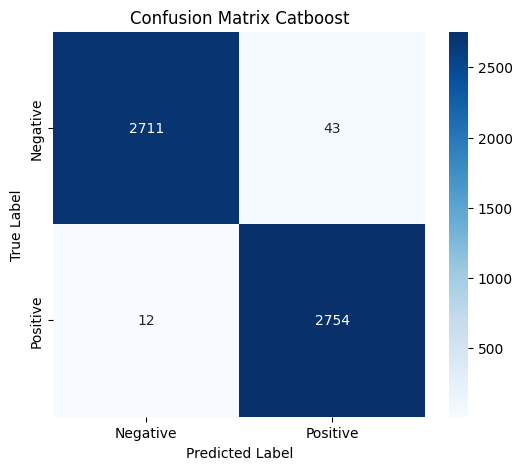

In [30]:
print("Catboost with oversampled data: ")
print(classification_report(y_test_rand,pred_cat_2))
plot_confusion_matrix(y_test_rand,pred_cat_2,"Catboost")
# 99% accuracy with oversampled data

### XGBOOST (99% accuracy for  oversampled data)

XGBoost with orignal data: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2747
           1       0.96      0.91      0.94       703

    accuracy                           0.97      3450
   macro avg       0.97      0.95      0.96      3450
weighted avg       0.97      0.97      0.97      3450



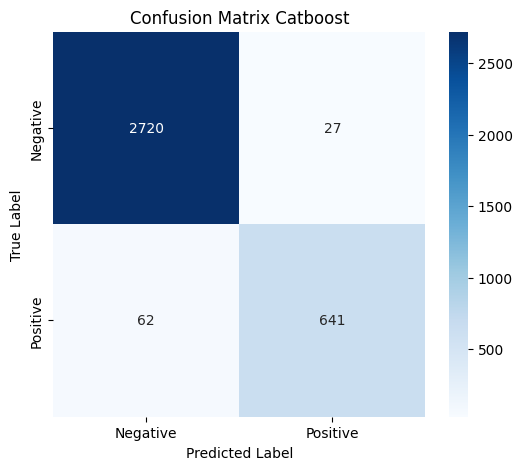

In [31]:
#baseline xgb with orignal data
from xgboost import XGBClassifier
xgb_clf_1 = XGBClassifier()
xgb_clf_1.fit(X_train,y_train)
pred_xgb_1 = xgb_clf_1.predict(X_test)
print("XGBoost with orignal data: ")
print(classification_report(y_test,pred_xgb_1))
plot_confusion_matrix(y_test,pred_xgb_1,"Catboost")

XGBoost with oversampled data: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2754
           1       0.99      1.00      0.99      2766

    accuracy                           0.99      5520
   macro avg       0.99      0.99      0.99      5520
weighted avg       0.99      0.99      0.99      5520



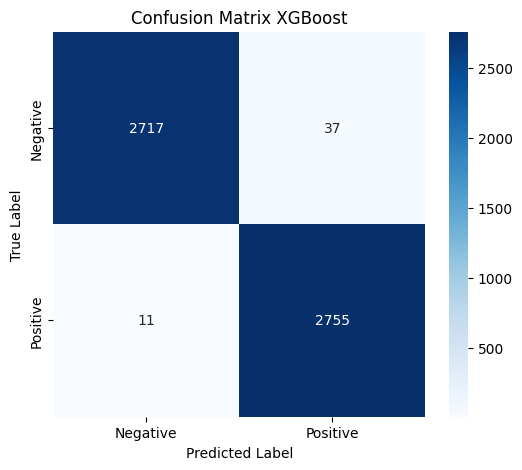

In [32]:
#xgb wuth oversampled data
xgb_clf_2 = XGBClassifier()
xgb_clf_2.fit(X_train_rand,y_train_rand)
pred_xgb_2 = xgb_clf_2.predict(X_test_rand)
print("XGBoost with oversampled data: ")
print(classification_report(y_test_rand,pred_xgb_2))
plot_confusion_matrix(y_test_rand,pred_xgb_2,"XGBoost")

### LGBM (99% accuracy with oversampled data)

[LightGBM] [Info] Number of positive: 1597, number of negative: 6453
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003008 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45390
[LightGBM] [Info] Number of data points in the train set: 8050, number of used features: 178
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.198385 -> initscore=-1.396418
[LightGBM] [Info] Start training from score -1.396418
LightGBM with orignal data: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2747
           1       0.97      0.93      0.95       703

    accuracy                           0.98      3450
   macro avg       0.97      0.96      0.97      3450
weighted avg       0.98      0.98      0.98      3450



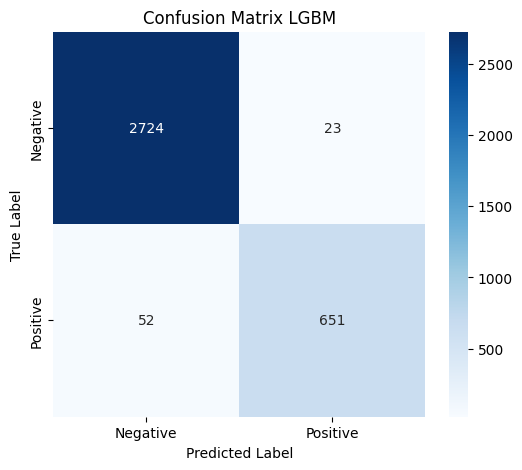

In [33]:
#lgbm with orignal data
from lightgbm import LGBMClassifier
lgbm_1 = LGBMClassifier()
lgbm_1.fit(X_train,y_train)
pred_lgbm_1 = lgbm_1.predict(X_test)
print("LightGBM with orignal data: ")
print(classification_report(y_test,pred_lgbm_1))
plot_confusion_matrix(y_test, pred_lgbm_1,"LGBM")

[LightGBM] [Info] Number of positive: 6434, number of negative: 6446
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.087851 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45390
[LightGBM] [Info] Number of data points in the train set: 12880, number of used features: 178
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499534 -> initscore=-0.001863
[LightGBM] [Info] Start training from score -0.001863
LightGBM with oversampled data: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2754
           1       0.98      1.00      0.99      2766

    accuracy                           0.99      5520
   macro avg       0.99      0.99      0.99      5520
weighted avg       0.99      0.99      0.99      5520



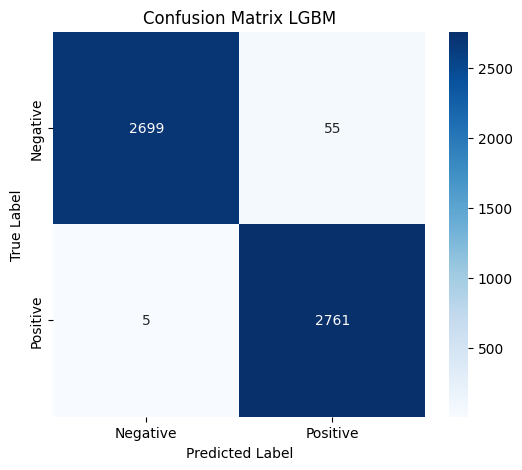

In [34]:
#lgbm with oversampled data
lgbm_2 = LGBMClassifier()
lgbm_2.fit(X_train_rand,y_train_rand)
pred_lgbm_2 = lgbm_2.predict(X_test_rand)
print("LightGBM with oversampled data: ")
print(classification_report(y_test_rand,pred_lgbm_2))
plot_confusion_matrix(y_test_rand, pred_lgbm_2,"LGBM")



# Deep Learning Models

### ANN

In [35]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2)
X_train_rand,X_val_rand,y_train_rand,y_val_rand = train_test_split(X_train_rand,y_train_rand,test_size=0.2)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [37]:
X_train.shape

(6440, 178)

In [38]:
def create_model():
    #define model
    model = Sequential()
    #layer 1 ->178
    model.add(Dense(178,activation='relu'))
    model.add(Dropout(0.2))
    #layer 2 ->89
    model.add(Dense(89,activation='relu'))
    model.add(Dropout(0.2))
    #layer 3 ->44
    model.add(Dense(44,activation='relu'))
    model.add(Dropout(0.2))
    #layer 4 ->22
    model.add(Dense(22,activation='relu'))
    model.add(Dropout(0.2))
    #layer 5 -> 11
    model.add(Dense(11,activation='relu'))
    model.add(Dropout(0.2))
    #layer 6 -> 6
    model.add(Dense(6,activation='relu'))
    #layer 7 ->3
    model.add(Dense(3,activation='relu'))
    #ouptut layer
    model.add(Dense(1,activation='sigmoid'))
    
    #compile model
    model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])
    
    return model

In [39]:
#ANN with orignal data
from tensorflow.keras.backend import clear_session
clear_session()
ANN_1 = create_model()

In [40]:
history_1 = ANN_1.fit(X_train,y_train,
         validation_data=(X_val,y_val),
         epochs=50,batch_size=128)

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6978 - loss: 0.6676 - val_accuracy: 0.9503 - val_loss: 0.5263
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9212 - loss: 0.4884 - val_accuracy: 0.9509 - val_loss: 0.1987
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9455 - loss: 0.2003 - val_accuracy: 0.9640 - val_loss: 0.1295
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9605 - loss: 0.1239 - val_accuracy: 0.9652 - val_loss: 0.1113
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9717 - loss: 0.0949 - val_accuracy: 0.9689 - val_loss: 0.0954
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9721 - loss: 0.0783 - val_accuracy: 0.9683 - val_loss: 0.1052
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9752 - loss: 0.0824 - val_accuracy: 0.9720 - val_loss: 0.0998
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9750 - loss: 0.0689 - val_accuracy: 0.9708 - val_loss:

In [41]:
loss_df_1 = pd.DataFrame(history_1.history)
loss_df_1.plot()

<Axes: >

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2747
           1       0.94      0.92      0.93       703

    accuracy                           0.97      3450
   macro avg       0.96      0.95      0.96      3450
weighted avg       0.97      0.97      0.97      3450



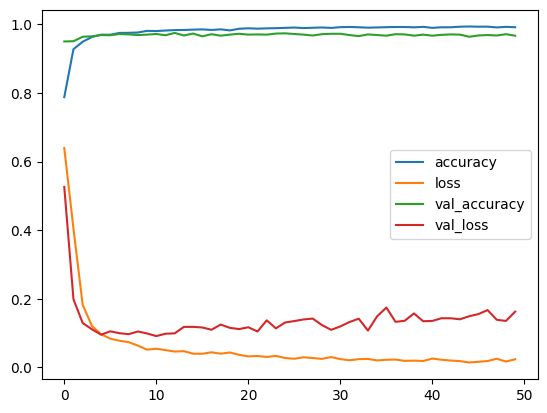

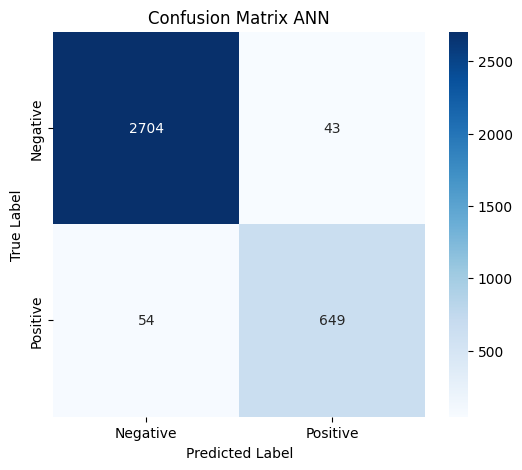

In [42]:
pred_ANN_1 = ANN_1.predict(X_test)
pred_ANN_1 = (pred_ANN_1 > 0.5).astype(int)
print(classification_report(y_test,pred_ANN_1))
plot_confusion_matrix(y_test,pred_ANN_1,"ANN")

In [43]:
#ANN with oversampled data
ANN_2 = create_model()

In [44]:
history_2 = ANN_2.fit(X_train_rand,y_train_rand,
         validation_data=(X_val_rand,y_val_rand),
         epochs=75,batch_size=128)

Epoch 1/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4424 - loss: 0.6994 - val_accuracy: 0.4903 - val_loss: 0.6932
Epoch 2/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4978 - loss: 0.6932 - val_accuracy: 0.4903 - val_loss: 0.6932
Epoch 3/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5021 - loss: 0.6932 - val_accuracy: 0.4903 - val_loss: 0.6932
Epoch 4/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4963 - loss: 0.6932 - val_accuracy: 0.4903 - val_loss: 0.6932
Epoch 5/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5058 - loss: 0.6931 - val_accuracy: 0.4903 - val_loss: 0.6932
Epoch 6/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4893 - loss: 0.6932 - val_accuracy: 0.4903 - val_loss: 0.6932
Epoch 7/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5005 - loss: 0.6932 - val_accuracy: 0.4903 - val_loss: 0.6933
Epoch 8/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4991 - loss: 0.6932 - val_accuracy: 0.4903 - val_loss:

Epoch 52/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4988 - loss: 0.6932 - val_accuracy: 0.4903 - val_loss: 0.6932
Epoch 53/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4947 - loss: 0.6932 - val_accuracy: 0.4903 - val_loss: 0.6932
Epoch 54/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5017 - loss: 0.6931 - val_accuracy: 0.4903 - val_loss: 0.6933
Epoch 55/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5047 - loss: 0.6931 - val_accuracy: 0.4903 - val_loss: 0.6932
Epoch 56/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5006 - loss: 0.6932 - val_accuracy: 0.4903 - val_loss: 0.6932
Epoch 57/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4971 - loss: 0.6932 - val_accuracy: 0.4903 - val_loss: 0.6932
Epoch 58/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5010 - loss: 0.6932 - val_accuracy: 0.4903 - val_loss: 0.6932
Epoch 59/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5059 - loss: 0.6931 - val_accuracy: 0.4903 - v

In [45]:
loss_df_2 = pd.DataFrame(history_2.history)
loss_df_2.plot()

<Axes: >

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2754
           1       0.50      1.00      0.67      2766

    accuracy                           0.50      5520
   macro avg       0.25      0.50      0.33      5520
weighted avg       0.25      0.50      0.33      5520



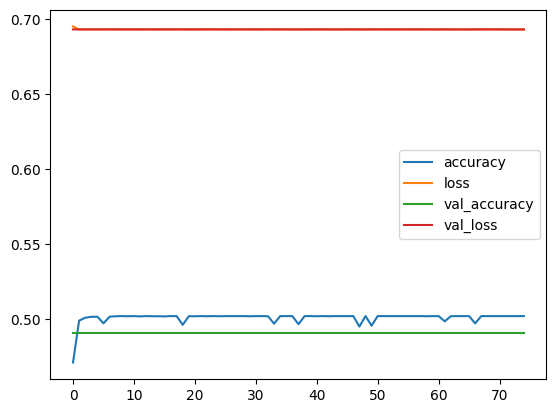

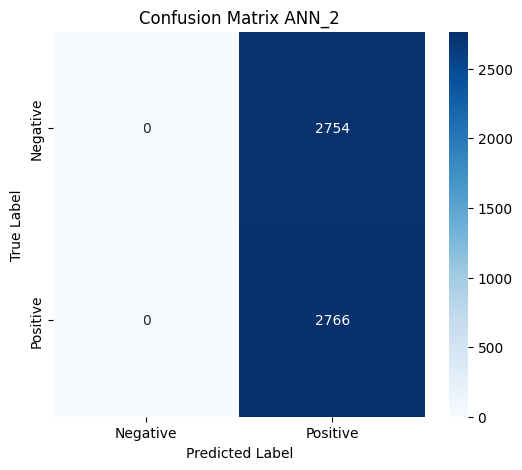

In [46]:
pred_ANN_2 = ANN_2.predict(X_test_rand)
pred_ANN_2 = (pred_ANN_2 > 0.5).astype(int)
print(classification_report(y_test_rand,pred_ANN_2))
plot_confusion_matrix(y_test_rand,pred_ANN_2,"ANN_2")

## LSTM

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM,Input

In [48]:
def create_LSTM():
    #define model
    model = Sequential()
    #Input Layer
    model.add(Input(shape=(X_train.shape[1],1)))
    #LSTM 1
    model.add(LSTM(units=128,return_sequences=True))
    #LSTM 2
    model.add(LSTM(units=128))
    #Dense layer 1
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.2))
    #Dense layer 2
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #layer 3
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.2))
    #layer 4
    model.add(Dense(16,activation='relu'))
    model.add(Dropout(0.2))
    #layer 5
    model.add(Dense(8,activation='relu'))
    model.add(Dropout(0.2))
    #layer 6
    model.add(Dense(4,activation='relu'))
    #layer 7
    model.add(Dense(2,activation='relu'))
    #output layer
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    model.summary()
    return model
    

In [49]:
LSTM_1 = create_LSTM()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 178, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,705 (881.66 KB)

 Trainable params: 225,705 (881.66 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
lstm_history_1 = LSTM_1.fit(X_train,y_train,
          validation_data=(X_val,y_val),
          epochs=50,batch_size=128)

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 18s 327ms/step - accuracy: 0.8266 - loss: 0.6627 - val_accuracy: 0.9571 - val_loss: 0.5741
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 18s 347ms/step - accuracy: 0.9364 - loss: 0.5896 - val_accuracy: 0.8832 - val_loss: 0.5819
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 17s 327ms/step - accuracy: 0.8680 - loss: 0.6088 - val_accuracy: 0.8255 - val_loss: 0.6012
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 17s 340ms/step - accuracy: 0.8574 - loss: 0.5771 - val_accuracy: 0.8329 - val_loss: 0.5124
Epoch 5/50
13/51 ━━━━━━━━━━━━━━━━━━━━ 11s 298ms/step - accuracy: 0.8543 - loss: 0.4878

KeyboardInterrupt: 

In [ ]:
loss_df_lstm_1 = pd.DataFrame(lstm_history_1.history)
loss_df_lstm_1.plot()

In [ ]:
pred_lstm_1 = (LSTM_1.predict(X_test)>0.5).astype(int)
print(classification_report(y_test,pred_lstm_1))
plot_confusion_matrix(y_test,pred_lstm_1)

In [ ]:
#with oversampled data
LSTM_2 = create_LSTM()

In [ ]:
lstm_history_2 = LSTM_2.fit(X_train_rand,y_train_rand,
          validation_data=(X_val_rand,y_val_rand),
          epochs=25,batch_size=128)

In [ ]:
pred_lstm_2 = (LSTM_2.predict(X_test_rand)>0.5).astype(int)
print(classification_report(y_test_rand,pred_lstm_2))
plot_confusion_matrix(y_test_rand,pred_lstm_2,"LSTM")

### BILSTM

In [ ]:
from tensorflow.keras.layers import Bidirectional

In [ ]:
def create_BILSTM()
    #define model
    model = Sequential()
    #Input Layer
    model.add(Input(shape=(X_train.shape[1],1)))

    model.add(Bidirectional(LSTM(units=128)))
    #Dense layer 1
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.2))
    #Dense layer 2
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #layer 3
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.2))
    #layer 4
    model.add(Dense(16,activation='relu'))
    model.add(Dropout(0.2))
    #layer 5
    model.add(Dense(8,activation='relu'))
    model.add(Dropout(0.2))
    #layer 6
    model.add(Dense(4,activation='relu'))
    #layer 7
    model.add(Dense(2,activation='relu'))
    #output layer
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    model.summary()
    return model
    

In [ ]:
#BILSTM with orignal data
BILSTM_1 = create_BILSTM()

In [ ]:
bilstm_history_1 = BILSTM_1.fit(X_train,y_train,
          validation_data=(X_val,y_val),
          epochs=50,batch_size=128)

In [ ]:
loss_df_bilstm_1 = pd.DataFrame(bilstm_history_1.history)
loss_df_bilstm_1.plot()

In [ ]:
pred_bilstm_1 = (BILSTM_1.predict(X_test)>0.5).astype(int)
print(classification_report(y_test,pred_bilstm_1))

In [ ]:
#Bilstm with oversampled data
BILSTM_2 = create_BILSTM()

In [ ]:
bilstm_history_2 = BILSTM_2.fit(X_train_rand,y_train_rand,
          validation_data=(X_val_rand,y_val_rand),
          epochs=50,batch_size=128)

In [ ]:
pred_bilstm_2 = (BILSTM_2.predict(X_test_rand)>0.5).astype(int)
print(classification_report(y_test_rand,pred_bilstm_2))

### BIGRU with oversampled

In [ ]:
from tensorflow.keras.layers import GRU

In [ ]:
def create_BIGRU():
    #define model
    model = Sequential()
    #Input Layer
    model.add(Input(shape=(X_train.shape[1],1)))

    model.add(Bidirectional(GRU(units=128)))
    #Dense layer 1
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.2))
    #Dense layer 2
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #layer 3
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.2))
    #layer 4
    model.add(Dense(16,activation='relu'))
    model.add(Dropout(0.2))
    #layer 5
    model.add(Dense(8,activation='relu'))
    model.add(Dropout(0.2))
    #layer 6
    model.add(Dense(4,activation='relu'))
    #layer 7
    model.add(Dense(2,activation='relu'))
    #output layer
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    model.summary()
    return model
    

In [ ]:
GRU_model = create_BIGRU()

In [ ]:
history_gru = GRU_model.fit(X_train_rand,y_train_rand,
          validation_data=(X_val_rand,y_val_rand),
          epochs=50,batch_size=128)

In [ ]:
loss_gru = pd.DataFrame(history_gru.history)
loss_gru.plot()

In [ ]:
pred_bigru = (GRU_model.predict(X_test_rand)>0.5).astype(int)
print(classification_report(y_test_rand,pred_bigru))

### Convolution model

In [ ]:
from tensorflow.keras.layers import Conv1D,BatchNormalization,MaxPooling1D,Flatten

In [ ]:
def create_CNN():
    #define model
    model = Sequential()
    #input
    model.add(Input(shape=(X_train.shape[1],1)))
    #Conv1d
    model.add(Conv1D(filters=32,kernel_size=(6),activation='relu'))
    #Batchnorm
    model.add(BatchNormalization())
    #Maxpool
    model.add(MaxPooling1D(2,padding='same'))
    #conv1d 2
    model.add(Conv1D(filters=32,kernel_size=(6),activation='relu'))
    #Batchnorm
    model.add(BatchNormalization())
    #Maxpool
    model.add(MaxPooling1D(2,padding='same'))
    #Flatten
    model.add(Flatten())
    #Dense
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.2))
    #layer 2
    model.add(Dense(16,activation='relu'))
    model.add(Dropout(0.2))
    #layer 3
    model.add(Dense(8,activation='relu'))
    #layer 4
    model.add(Dense(4,activation='relu'))
    #layer 5
    model.add(Dense(2,activation='relu'))
    #output
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    model.summary()
    return model
    

In [ ]:
cnn_model = create_CNN()

In [ ]:
history_cnn = cnn_model.fit(X_train_rand,y_train_rand,
          validation_data=(X_val_rand,y_val_rand),
          epochs=50,batch_size=128)

In [ ]:
loss_cnn = pd.DataFrame(history_cnn.history)
loss_cnn.plot()

In [ ]:
pred_cnn = (cnn_model.predict(X_test_rand)>0.5).astype(int)
print(classification_report(y_test_rand,pred_cnn))
plot_confusion_matrix(y_test,pred_cnn,"CNN")